# **Covid-19 Analysis in Poland**


The aim of this project is to use various libraries in order to present data in different ways.
The data was taken from dataset created by Michał Rogalski (https://docs.google.com/spreadsheets/d/1ierEhD6gcq51HAm433knjnVwey4ZE5DCnu1bW7PRG3E/edit#gid=1309014089) who based on data from official Polish government sites. 


Unfortunately due to GitHub limitations plotly graphs are not interactive and they are in **png** format

Data from beginning of Covid-19 pandemic in Poland - 4th March 2020 until 1st February 2021 

## **Parts:**
1. Accumulated cases and deaths
2. New cases
3. Analysis of Covid deaths (until Nov 2020)
4. Vaccinations and correlation between deaths and vaccinations

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import cufflinks as cf
import plotly.offline as pyo

import folium
import seaborn as sns

**Adjusting frame sizes**

In [170]:
plt.rcParams['figure.figsize'] = 18,9

## **1. Accumulated number of Covid cases and deaths** 

Using data from Excel file 'case_cumulative2'

In [172]:
xls = pd.ExcelFile('C:\\Users\\main\\Desktop\\Poland_covid_analysis\\case_cumulative2.xlsx')
data_c = pd.read_excel(xls, 'Total_cases')
data_d = pd.read_excel(xls, 'Total_deaths')

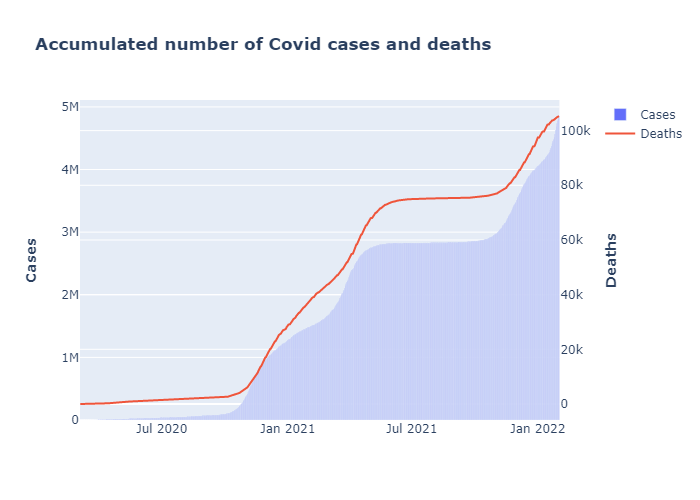

In [173]:
#Creating graph using Plotly
fig1 = make_subplots(specs=[[{"secondary_y": True}]])

fig1.add_trace(
    go.Bar(x=data_c['Date'], y=data_c['Poland'], name='Cases'),
    secondary_y=False,)

fig1.add_trace(
    go.Scatter(x=data_d['Date'], y=data_d['Poland'],name='Deaths'),
    secondary_y=True,)

fig1.update_yaxes(title_text="<b>Cases</b>", secondary_y=False)
fig1.update_yaxes(title_text="<b>Deaths</b>", secondary_y=True)
fig1.update_layout(title_text="<b>Accumulated number of Covid cases and deaths</b>")

#Github does not support interactive elements thus data has to be presented as for instance png
fig1.show("png")

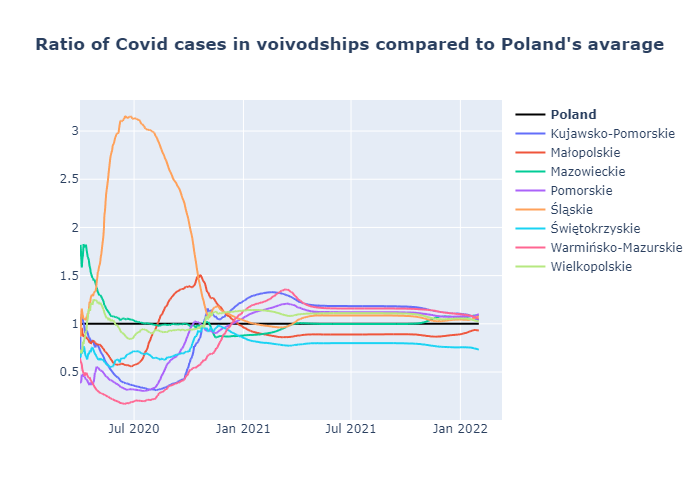

In [174]:
data_c2 = pd.read_excel(xls, 'To Poland')
fig2 = px.line(data_c2, x='Date')

fig2 = px.line(data_c2,
    x='Date', 
    y=(['Kujawsko-Pomorskie','Małopolskie','Mazowieckie','Pomorskie','Śląskie','Świętokrzyskie', 
        'Warmińsko-Mazurskie','Wielkopolskie']),
    title='<b>Ratio of Covid cases in voivodships compared to Poland\'s avarage </b>',
    labels={'Date':'', 'values':'','variable':''})
fig2.add_scatter(x=data_c2['Date'], y=data_c2['Poland'], marker_color='black', name='<b>Poland</b>', legendrank=1)
fig2.update_yaxes(title_text='')

fig2.show('png')



In [175]:
#editing table using Pandas
data_voiv = pd.read_excel('C:\\Users\\main\\Desktop\\Poland_covid_analysis\\Voivodeship_stats.xlsx')
data_voiv.drop(['No'], axis = 1, inplace = True)
data_voiv['Total active cases'] = data_voiv['Total cases'] - data_voiv['Total deaths'] - data_voiv['Total cured']
data_voiv['Active cases per 100k people'] = data_voiv['Total active cases'] * 100000 / data_voiv['Population']
data_voiv['Cases per 100k people'] = data_voiv['Total cases'] * 100000 / data_voiv['Population']
data_voiv['Deaths per 100k people'] = data_voiv['Total deaths'] * 100000 / data_voiv['Population']

display(data_voiv.round(2))

,Voivodeship,Total cases,Total deaths,Total cured,Population,Total active cases,Active cases per 100k people,Cases per 100k people,Deaths per 100k people
0,Dolnośląskie,374901,6693,340877,2901225.0,27331,942.05,12922.16,230.70
1,Kujawsko-Pomorskie,273372,6541,236620,2077775.0,30211,1454.01,13156.96,314.81
2,Lubelskie,251576,7153,233021,2117619.0,11402,538.43,11880.14,337.79
3,Lubuskie,117043,2786,111649,1014548.0,2608,257.06,11536.47,274.61
4,Łódzkie,300077,7257,271050,2466322.0,21770,882.69,12166.98,294.24
5,Małopolskie,400122,8518,361608,3400577.0,29996,882.09,11766.30,250.49
6,Mazowieckie,743366,13275,697850,5403412.0,32241,596.68,13757.34,245.68
7,Opolskie,124426,3066,114082,986506.0,7278,737.76,12612.80,310.79
8,Podkarpackie,217078,6465,196518,2129015.0,14095,662.04,10196.17,303.66
9,Podlaskie,125570,3417,114230,1181533.0,7923,670.57,10627.72,289.20


In [176]:
#showing only two columns in descending order, highligted in red
cases_fraction = data_voiv.groupby('Voivodeship')['Active cases per 100k people'].sum().sort_values(ascending = False).to_frame()
cases_fraction.style.background_gradient(cmap='Reds')
display(cases_fraction.style.background_gradient(cmap='Reds'))

,Active cases per 100k people
Voivodeship,
Kujawsko-Pomorskie,1454.007291
Śląskie,1191.225890
Pomorskie,1051.800218
Zachodniopomorskie,990.929025
Dolnośląskie,942.050341
Łódzkie,882.690906
Małopolskie,882.085599
Warmińsko-Mazurskie,762.710263
Opolskie,737.755270




**Displaying results on the map using folium**

Using data from Excel file 'coordinates'

In [221]:
voiv_coords = pd.read_excel('C:\\Users\\main\\Desktop\\Poland_covid_analysis\\coordinates.xlsx')

#merging information about cases in voivodeship with their location
data_full = pd.merge(voiv_coords, data_voiv, on = 'Voivodeship')

#using folium to display results on the map
map_pl = folium.Map(location = [52,20], zoom_start = 6, tiles = 'Stamenterrain')
for lat, long, value, name in zip(data_full['Latitude'], data_full['Longitude'], data_full['Deaths per 100k people'], data_full['Voivodeship']):
    folium.CircleMarker([lat,long], radius=value*0.15, popup=('<strong>Voivodeship</strong>: ' + str(name).capitalize()
    +' <br>''<strong>Total cases</strong>: ' + str(value) + '</br>'), color = 'red', fill_color = 'red', fill_opacity=0.3).add_to(map_pl)
display(map_pl)

## **2. Number of new cases**

Using data from Excel file 'new_cases'

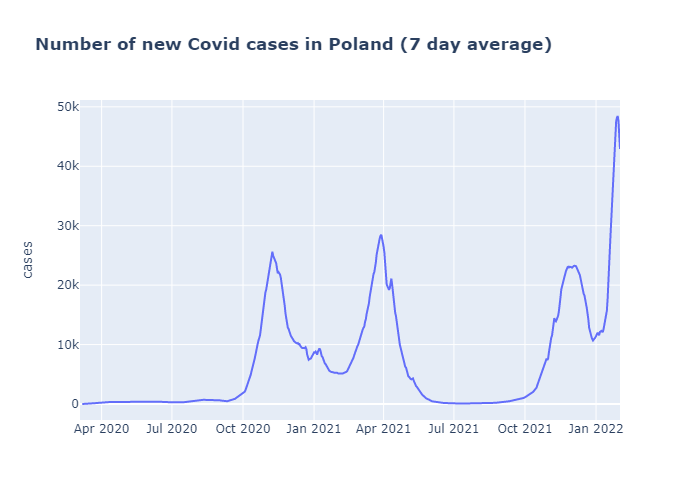

In [214]:
data_waves = pd.read_excel('C:\\Users\\main\\Desktop\\Poland_covid_analysis\\new_cases.xlsx')
fig3 = px.line(data_waves,
    x='date', 
    y='average',
    title = '<b>Number of new Covid cases in Poland (7 day average)</b>')

fig3.update_yaxes(title_text='cases')
fig3.update_xaxes(title_text='')

fig3.show("png")

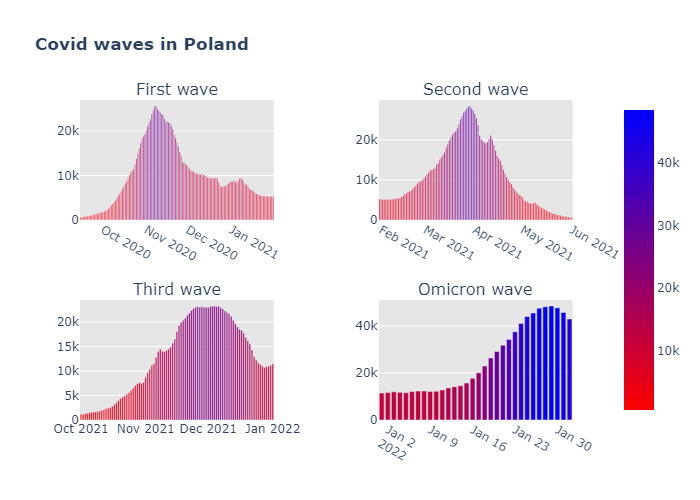

In [215]:
#selecting data to distinguish Covid waves
wave1 = data_waves.loc[(data_waves['no']>=196) & (data_waves['no']<=334)]
wave2 = data_waves.loc[(data_waves['no']>=334) & (data_waves['no']<=455)]
wave3 = data_waves.loc[(data_waves['no']>=577) & (data_waves['no']<=669)]
wave4 = data_waves.loc[(data_waves['no']>=669) & (data_waves['no']<=700)]

#making subplots
fig4 = make_subplots(rows=2, cols=2, specs=[[{'secondary_y':True},{'secondary_y':True}],[{'secondary_y':True},{'secondary_y':True}]], 
        subplot_titles=('First wave', 'Second wave', 'Third wave', 'Omicron wave'))

fig4.add_trace(go.Bar(x=wave1['date'],y=wave1['average'],
               marker = dict(color = wave1['average'],coloraxis='coloraxis')),1,1)
fig4.add_trace(go.Bar(x=wave2['date'],y=wave2['average'],
               marker = dict(color =wave2['average'], coloraxis='coloraxis')),1,2)
fig4.add_trace(go.Bar(x=wave3['date'],y=wave3['average'],
               marker = dict(color =wave3['average'], coloraxis='coloraxis')),2,1)
fig4.add_trace(go.Bar(x=wave4['date'],y=wave4['average'],
               marker = dict(color =wave4['average'], coloraxis='coloraxis')),2,2)
fig4.update_layout(coloraxis=dict(colorscale = 'Bluered_r'), showlegend = False, title_text = '<b>Covid waves in Poland</b>')
fig4.update_layout(plot_bgcolor = 'rgb(230, 230, 230)')

fig4.show("png")

## **3. Analysis of Covid deaths in Poland**

**Displaying data**

Reported Covid deaths until 18 Nov 2020 (first 11 454 deaths)

In [180]:
death_l = pd.read_excel('C:\\Users\\main\\Desktop\\Poland_covid_analysis\\death_list.xlsx')
#renaming columns
death_l.rename(columns={'Nr': 'no', 'Wiek Zmarłego': 'age', 
                   'Płeć': 'sex', 'Data zaraportowania zgonu': 'date', 'Voivodeship': 'voiv', 
                   'Miejsce Zgonu': 'place'}, inplace=True)
death_l.sex.replace({'M':'Male', 'K':'Female'}, inplace=True)

display(death_l)

,no,age,sex,date,voiv,place,Unnamed: 6,Unnamed: 7,AAA
0,1,57.0,Female,2020-03-12,Wielkopolskie,Poznań,NaN,NaN,K
1,2,73.0,Male,2020-03-13,Dolnośląskie,Wrocław,NaN,NaN,M
2,3,66.0,Male,2020-03-14,Lubelskie,Lublin,NaN,NaN,M
3,4,67.0,Male,2020-03-16,Podkarpackie,Łańcut,NaN,NaN,M
4,5,57.0,Male,2020-03-17,Dolnośląskie,Wałbrzych,NaN,NaN,M
...,...,...,...,...,...,...,...,...,...
11449,11450,80.0,Male,2020-11-18,podkarpackie,-,NaN,NaN,M
11450,11451,89.0,Male,2020-11-18,podkarpackie,-,NaN,NaN,M
11451,11452,85.0,Female,2020-11-18,podkarpackie,-,NaN,NaN,K
11452,11453,79.0,Female,2020-11-18,podkarpackie,-,NaN,NaN,K


In [181]:
mean_age = death_l['age'].mean()
tw = death_l.loc[(death_l['sex'])==('Female')]
mean_age_woman = tw['age'].mean()
tm = death_l.loc[(death_l['sex'])==('Male')]
mean_age_man = tm['age'].mean()

table = {'Group':['all','females','males'],
        'Mean age':[mean_age, mean_age_woman, mean_age_man]}
df = pd.DataFrame(table).round(2)
display(df)

,Group,Mean age
0,all,75.36
1,females,77.83
2,males,73.53


Text(0.5, 1.0, 'Age distribution')

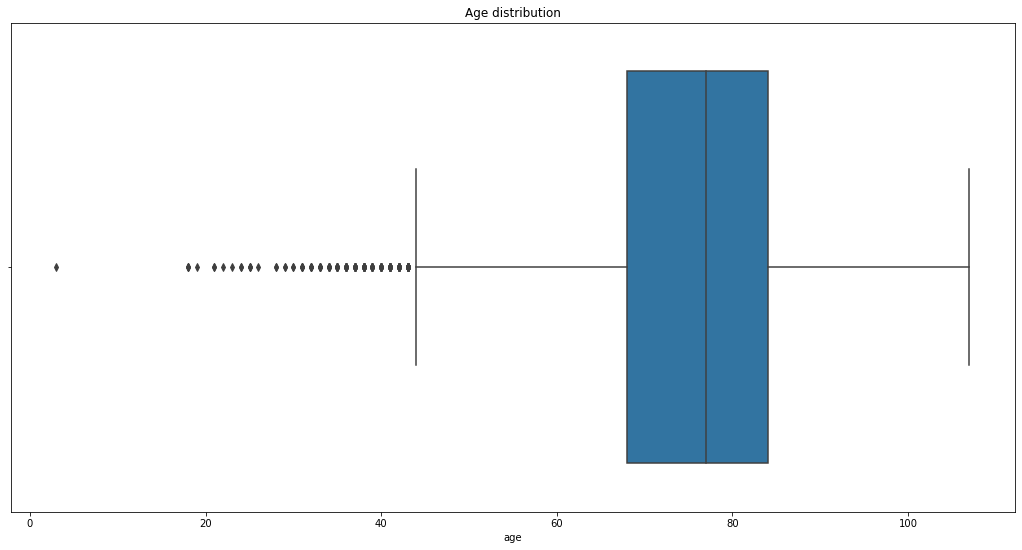

In [182]:
#using matplotlib and seaborn
gr1 = sns.boxplot(x=death_l['age'])
display(plt.title('Age distribution'))

<AxesSubplot:title={'center':'Age distribution accroding to sex'}, xlabel='sex', ylabel='age'>

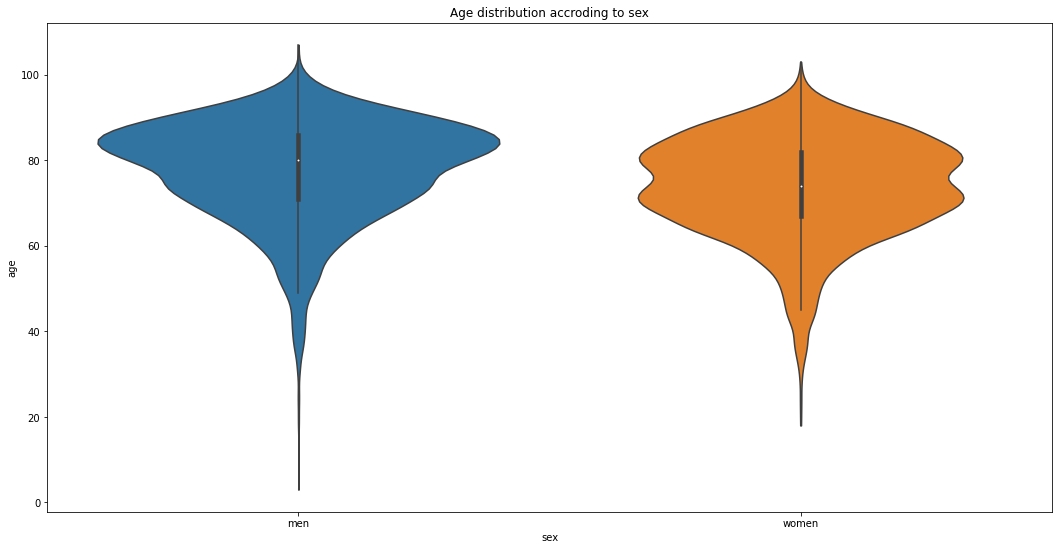

In [183]:
gr2 = sns.violinplot(x='sex', y='age', data=death_l, cut=0)
plt.title('Age distribution accroding to sex')
gr2.set_xticklabels(['men', 'women'], rotation=0)

display(gr2)

<AxesSubplot:title={'center':'Sex distribution'}, ylabel='sex'>

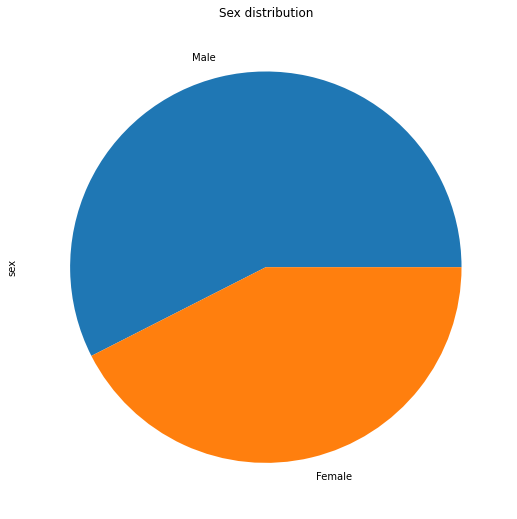

In [184]:
plt.title('Sex distribution')
display(death_l['sex'].value_counts().plot(kind='pie'))

<AxesSubplot:title={'center':'Number of deaths until 18 Nov in voivodeships'}>

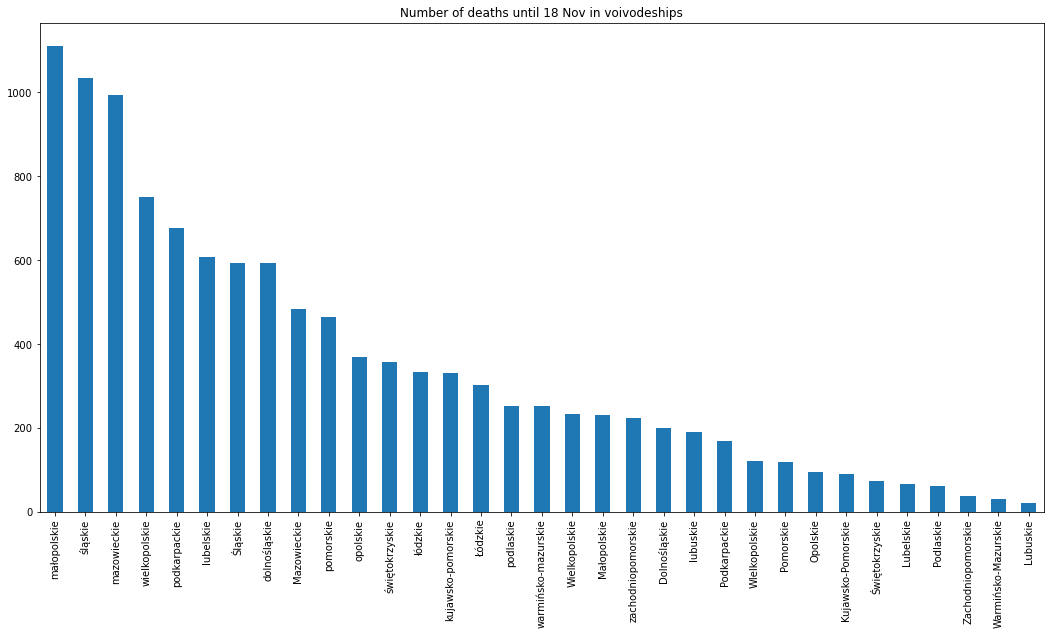

In [185]:
plt.title('Number of deaths until 18 Nov in voivodeships')
display(death_l['voiv'].value_counts().plot(kind='bar'))

## **4. Vaccines**

In [186]:
data_vacc = pd.read_excel('C:\\Users\\main\\Desktop\\Poland_covid_analysis\\vaccine.xlsx')
data_vd = pd.merge(data_vacc, data_voiv, on = 'Voivodeship')

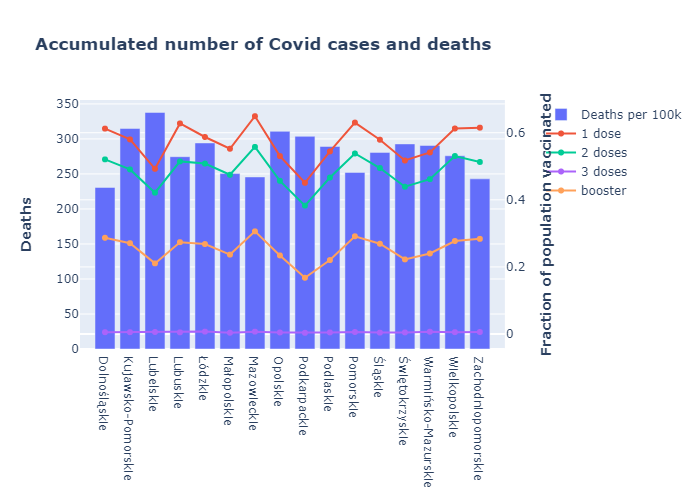

In [187]:
fig5 = make_subplots(specs=[[{"secondary_y": True}]])

fig5.add_trace(
    go.Bar(x=data_vd['Voivodeship'], y=data_vd['Deaths per 100k people'], name='Deaths per 100k'),
    secondary_y=False,)

fig5.add_trace(
    go.Scatter(x=data_vd['Voivodeship'], y=data_vd['dose1f'],name='1 dose'),
    secondary_y=True,)
fig5.add_trace(
    go.Scatter(x=data_vd['Voivodeship'], y=data_vd['dose2f'],name='2 doses'),
    secondary_y=True,)
fig5.add_trace(
    go.Scatter(x=data_vd['Voivodeship'], y=data_vd['dose3f'],name='3 doses'),
    secondary_y=True,)
fig5.add_trace(
    go.Scatter(x=data_vd['Voivodeship'], y=data_vd['boosterf'],name='booster'),
    secondary_y=True,)

fig5.update_yaxes(title_text="<b>Deaths</b>", secondary_y=False)
fig5.update_yaxes(title_text="<b>Fraction of population vaccinated</b>", secondary_y=True)
fig5.update_layout(title_text="<b>Accumulated number of Covid cases and deaths</b>")

fig5.show("png")

In [188]:
data_vd.drop(['dose1','dose2','dose3','booster','Total cases','Total deaths','Total cured','Population','population',
              'Total active cases','Active cases per 100k people','Cases per 100k people'], axis=1, inplace=True)

<AxesSubplot:title={'center':'Pearson Correlation'}>

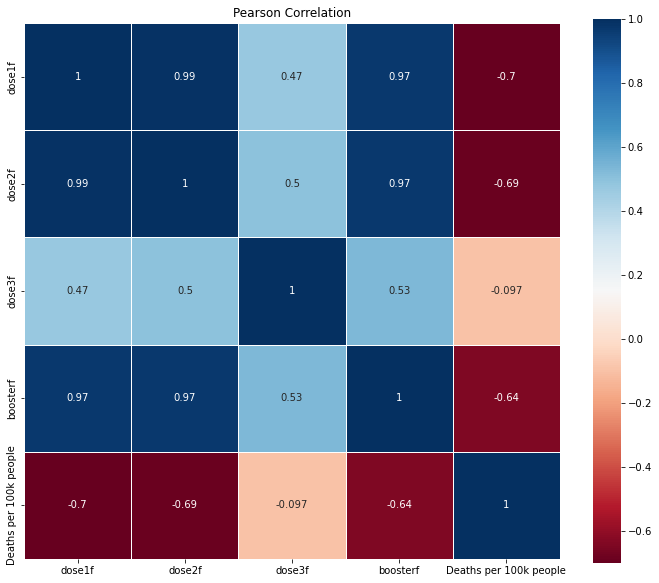

In [189]:
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation')
display(sns.heatmap(data_vd.corr(),linewidths=1,
            square=True, cmap='RdBu', linecolor='white', annot=True))

**Conclusion**: As it can be seen on Person's Correlation Table Deaths and vaccine doses are strongly negatively correlated which means the more doses, the more deaths per 100k people. Especially it can be seen in case of 1st dose, 2nd dose and booster where correlation is about -0.65.